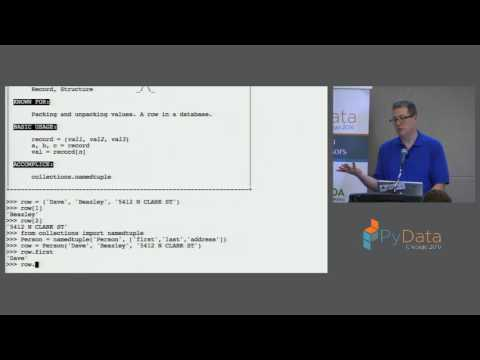

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyDLAutA88s', width=800, height=300)

In [ ]:
# 1. Посмотрите видео Дэвида Бизли про всроенные инструменты Python
# 2. Попробуйте используя встроенные инструменты Python проанизировать таблицу из файла "Vacancy.csv"
# 3. Попробуйте ответить на вопросы:
# Сколько вакансий, которые вам нравятся?
# Насколько свежие эти вакансии?
# Сколько вакансий с позициями на которых вы работаете?
# Сколько вакансий для аналатика данных?
# Сколько вакансий для аналитика данных с использованием Python?

# В задании важно не использовать pandas и numpy, а встроенные инструменты python
# Counter, CSV, defaultdict, sorted

In [2]:
import csv

In [3]:
import sys

In [4]:
csv.field_size_limit(100000000)

131072

In [5]:
vacs = list(csv.DictReader(open('vacancy.csv',encoding='utf-8',newline='')))

In [22]:
for line in vacs[:4]:
  print(line['vacid'])
  

1474941
1476154
1479834
1484458


In [8]:
len(vacs)

4002

In [25]:
analytics = [ line for line in vacs if line['vactitle'].find('Аналитик') != -1 or line['vactitle'].find('аналитик') != -1]

Итого Вакансий аналитиков - 389:

In [27]:
len(analytics)

389

In [28]:
for line in analytics[:4]:
  print(line['vactitle'])

Аналитик/разработчик  (Программа 'Миграция Legacy АС на Фабрику Данных')
Data - аналитик
Системный аналитик. Сервис Автокредитование
Аналитик (информационная безопасность)


Создаем выборку аналитиков с требованием знания Python

In [33]:
analytics_python = [ line for line in vacs if (line['vactitle'].find('Аналитик') != -1 or line['vactitle'].find('аналитик') != -1) and (line['vacdescription'].find('Python') != -1 or line['vacdescription'].find('python') != -1)]

Итого вакансий аналитиков - питонистов = 57:

In [34]:
len(analytics_python)

57

In [17]:
import datetime

Выводим возраст вакансий и добавляем в строки поиска:

In [35]:
for line in analytics_python:
    vacancy_age = datetime.datetime.now() - datetime.datetime.strptime(line['vacdate'],'%Y-%m-%d')
    y = [('vacancy_age', vacancy_age.days)]
    line.update (y)


Проверяем, что 'vacancy_age' прикрепилось к вакансиям в выборке:

In [58]:
analytics_python[9]

{'id': '384364',
 'created_at': '2021-03-14 09:39:21.854462',
 'updated_at': '2021-03-14 09:39:21.854584',
 'vacid': '1522969',
 'vactitle': 'Ведущий аналитик',
 'vacdescription': 'Мы – Трайб «Управление модельного риска». Мы разрабатываем новую инновационную Платформу Sberbank.DS Ecosystem. Это линейка продуктов, решающая задачи Сбербанка по ускоренной разработке, валидации и мониторингу AI моделей. Стратегически планируется продвижение Платформы (коробочный продукт, облачные сервисы) на российский и международный рынок. Развитие Платформы соответствует мировым трендам «демократизации AI», когда разработка модели превращается в задачу, доступную любому пользователю через средства визуального проектирования и использование библиотеки готовых компонентов. Мировой рынок систем подобного класса оценивается в 150+ млрд. долларов. Наши конкуренты – Google, Microsoft, Amazon, SAS, IBM, Huawei. Важной частью экосистемы Sberbank.DS является проект Библиотека моделей (MMS).Целевая аудитория сис

In [41]:
for line in analytics_python:
    print(line['vacancy_age'])

20
20
23
24
25
25
25
26
30
31
32
32
33
33
33
33
34
37
35
38
37
38
39
39
39
43
45
47
47
47
52
53
55
58
58
59
60
60
60
61
61
62
69
73
73
82
97
97
97
110
117
121
135
19
19
20
19


Сортируем выборку (зрительная оценка возраста вакансий недостаточна, оставил это действие для "портфолио")

In [42]:
from operator import itemgetter
analytics_py_sorted = sorted(analytics_python, key = itemgetter('vacancy_age'))


In [44]:
for line in analytics_py_sorted:
    print(line['vacancy_age'])

19
19
19
20
20
20
23
24
25
25
25
26
30
31
32
32
33
33
33
33
34
35
37
37
38
38
39
39
39
43
45
47
47
47
52
53
55
58
58
59
60
60
60
61
61
62
69
73
73
82
97
97
97
110
117
121
135


Считаем количество с использованием counter по возрасту (вышло неинформативно)

In [46]:
from collections import Counter

In [51]:
an_py_vacage = Counter(row['vacancy_age'] for row in analytics_python)
an_py_vacage.most_common(10)

[(33, 4),
 (20, 3),
 (25, 3),
 (39, 3),
 (47, 3),
 (60, 3),
 (97, 3),
 (19, 3),
 (32, 2),
 (37, 2)]

Определяем самые частые названия вакансий аналитиков с Python

In [55]:
an_py_count = Counter(row['vactitle'] for row in analytics_python)
an_py_count.most_common(5)

[('Системный аналитик', 6),
 ('Аналитик данных', 2),
 ('Ведущий аналитик', 2),
 ('IT Аналитик', 1),
 ('Аналитик SQL (кампании продаж)', 1)]

Напоследок, можно посмотреть самые частые вакансии во всей выгрузке vacs:

In [57]:
all_vacs_count = Counter(row['vactitle'] for row in vacs)
all_vacs_count.most_common(10)

[('Мобильный менеджер по продажам', 229),
 ('Старший менеджер по обслуживанию', 172),
 ('Специалист по прямым продажам', 164),
 ('Менеджер по продажам', 86),
 ('Системный аналитик', 62),
 ('Менеджер по работе с ключевыми клиентами малого бизнеса', 53),
 ('Java разработчик', 40),
 ('Водитель-инкассатор', 38),
 ('Старший специалист по взысканию задолженности', 38),
 ('Главный клиентский менеджер малого бизнеса', 34)]